## Wanneer laad ik mijn smartphone op?

### Set up


We weten dat de batterijlading van een smartphone sterk daalt als je hem veel gebruikt. Nu willen we dit in kaart brengen. We hebben een aantal testexemplaren volledig opgeladen en geven deze mee met personen die de smartphones gebruiken. Wanneer de batterijlading op 20% komt, noteren de personen het aantal uren standby en het aantal uren gebruikt. Je vindt deze data in "smartphones.csv".

1. lees de data in. Hoeveel rijen zijn er?

In [1]:
import pandas as pd

smartphones = pd.read_csv('data/smartphones.csv', sep=',', decimal='.')

display(smartphones)

,usage,standby
0,2.883495,93.622233
1,7.009684,25.832790
2,0.966821,75.322096
3,4.579412,63.088735
4,1.903283,94.866359
...,...,...
95,4.635983,70.667516
96,5.428050,70.520763
97,4.206757,61.587526
98,4.151233,82.306191


2. Bereken per toestel het totaal aantal uren dat deze aan stond tot 20% (gebruikte uren en standby
uren). Hoeveel uren vind je voor het eerste toestel?

In [2]:
smartphones['totaal_uren'] = smartphones['standby'] + smartphones['usage']
display(smartphones)

,usage,standby,totaal_uren
0,2.883495,93.622233,96.505727
1,7.009684,25.832790,32.842474
2,0.966821,75.322096,76.288917
3,4.579412,63.088735,67.668147
4,1.903283,94.866359,96.769642
...,...,...,...
95,4.635983,70.667516,75.303499
96,5.428050,70.520763,75.948813
97,4.206757,61.587526,65.794284
98,4.151233,82.306191,86.457424


3. We zoeken nu een verband tussen het aantal uren dat de smartphone gebruikt werd en het totaal
aantal uren totdat de batterij op 20% stond. Maak eerst een scatterplot van deze 2 variabelen. Wat
zie je?

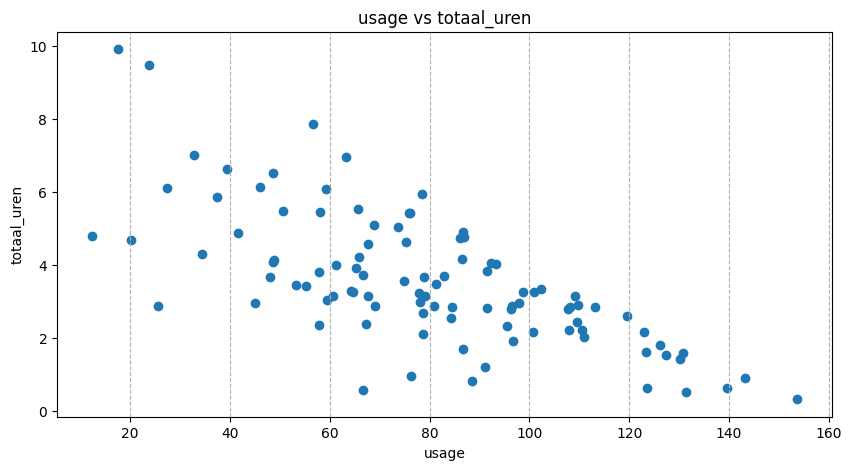

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(smartphones.totaal_uren, smartphones.usage)
ax.set_title('usage vs totaal_uren')
ax.set_xlabel('usage')
ax.set_ylabel('totaal_uren')
_ = ax.grid(linestyle='--', axis='x')

4. Bereken de correlatie volgens Pearson en Kendall. Wat zeggen deze waarden?

In [4]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

kendall = smartphones.corr(method='kendall')
display(kendall)
spearman = smartphones.corr(method='spearman')
display(spearman)

,usage,standby,totaal_uren
usage,1.000000,-0.541010,-0.517576
standby,-0.541010,1.000000,0.976566
totaal_uren,-0.517576,0.976566,1.000000


,usage,standby,totaal_uren
usage,1.000000,-0.726337,-0.699526
standby,-0.726337,1.000000,0.998668
totaal_uren,-0.699526,0.998668,1.000000


5. Teken de regressielijn bij de scatterplot. Wat zijn de waarden voor slope en intercept?

LinearRegression()

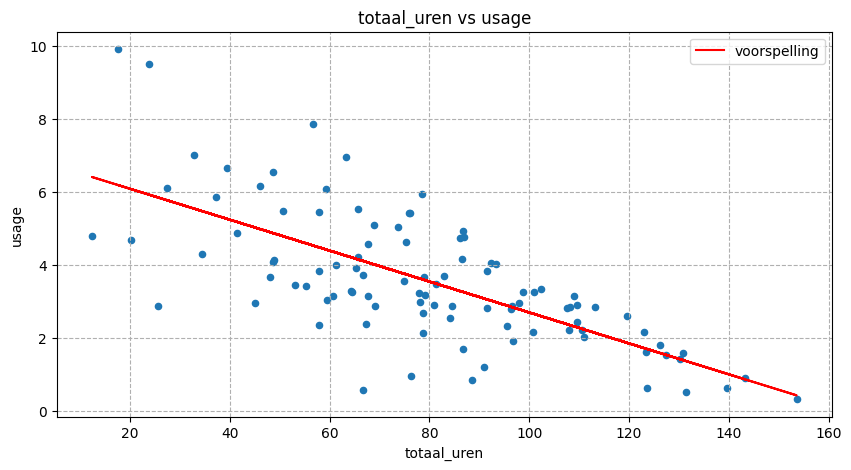

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = smartphones[['totaal_uren']]
y = smartphones.usage

model.fit(X, y)

y_hat = model.predict(X)  # voorspellingen maken

ax = smartphones.plot(kind='scatter', x='totaal_uren', y='usage', figsize=(10, 5), title='totaal_uren vs usage', marker='o')
ax.plot(smartphones.totaal_uren, y_hat, color='r', label='voorspelling')
ax.grid(linestyle='--')
_ = ax.legend()

6. Wat is de waarde van R²? Wat is de betekenis?

In [29]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = smartphones[['totaal_uren']]
y = smartphones.usage

model.fit(X, y)
y_hat = model.predict(X)  # voorspellingen maken

print(r2_score(y, y_hat))  # kan je altijd gebruiken
# of
print(model.score(X, y))  # kan je gebruiken als je een model hebt

LinearRegression()

0.4857351538416178
0.4857351538416178


7. Wat is de standaardschattingsfout? Wat betekent dit?

In [32]:
# Standaardschattingsfout of standard error
# De standaardschattingsfout is een statistische maatstaf voor de betrouwbaarheid van de schatting van een populatieparameter op basis van een steekproef van de gegevens.

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = smartphones[['totaal_uren']]
y = smartphones.usage

model.fit(X, y)
y_hat = model.predict(X)  # voorspellingen maken

se = mean_squared_error(y, y_hat, squared=False)
print(se)

LinearRegression()

1.3014982108471536


8. Als iemand een smartphone gedurende 3 uur nodig heeft, hoe lang zal het dan duren vooraleer de
smartphone opgeladen moet worden?

In [36]:
x = (3 - 6.927772435846967) / -0.04234725
print('x =', x)

x = 92.75153488944302


9. Stel dat je een verband zoekt tussen het gebruikspercentage en de totale tijd voordat je moet
opladen. Zoek de juiste variabelen en maak een scatterplot. Wat zie je? Kan je hiervoor lineaire
regressie gebruiken? Waarom wel of niet? Welk regressiemodel is in dit geval het beste? Wat is
dan de uiteindelijke formule voor het model?

,R²
lineair,0.499673
logaritmisch,0.714612
kwadratisch,0.725587
exponentieel,0.793184
kubisch,0.803977


Text(0.5, 1.0, 'Verband totaal aantal uren vs gebruik')

Text(0.5, 0, 'total')

Text(0, 0.5, 'usage')

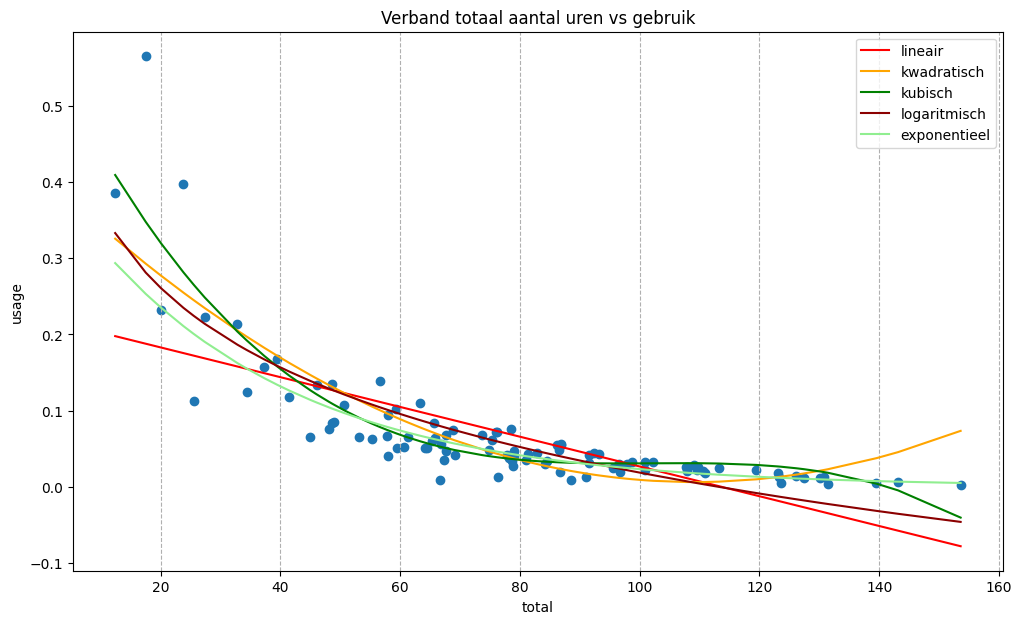

In [35]:
from hulpfuncties import *

smartphones['gebruikspercentage'] = smartphones.usage / smartphones.totaal_uren
x = smartphones.totaal_uren.to_numpy()
y = smartphones.gebruikspercentage.to_numpy()

model1 = GeneralRegression()
model1.fit(x, y)

model2 = GeneralRegression(degree=2)
model2.fit(x, y)

model3 = GeneralRegression(degree=3)
model3.fit(x, y)

model4 = GeneralRegression(log=True)
model4.fit(x, y)

model5 = GeneralRegression(exp=True)
model5.fit(x, y)

pd.DataFrame([model1.r2_score, model2.r2_score, model3.r2_score, model4.r2_score, model5.r2_score],
             index=['lineair', 'kwadratisch', 'kubisch', 'logaritmisch', 'exponentieel'],
             columns=['R²']).sort_values(by='R²')

x = np.sort(smartphones.totaal_uren)
y_hat_1 = model1.predict(x)
y_hat_2 = model2.predict(x)
y_hat_3 = model3.predict(x)
y_hat_4 = model4.predict(x)
y_hat_5 = model5.predict(x)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(smartphones.totaal_uren, smartphones.gebruikspercentage)
ax.plot(x, y_hat_1, color='red', label='lineair')
ax.plot(x, y_hat_2, color='orange', label='kwadratisch')
ax.plot(x, y_hat_3, color='green', label='kubisch')
ax.plot(x, y_hat_4, color='darkred', label='logaritmisch')
ax.plot(x, y_hat_5, color='lightgreen', label='exponentieel')
ax.set_title('Verband totaal aantal uren vs gebruik')
ax.set_xlabel('total')
ax.set_ylabel('usage')
ax.grid(linestyle='--', axis='x')
_ = ax.legend()